In [376]:
ITERATIONS = 20
import numpy as np

### Define Function f(x)

In [377]:
def f(x):
    return -(x**5)+5*(x**3)+20*x-5

---
### Some methods

In [378]:
### Initialize Position List
def Initialize_Position(List):
    return List

### Initialize Velocities
def Initialize_Velocities():
    return [0, 0, 0, 0]

### Get Local Best Position
def Get_Local_Best_Position(List, Current_Local_Best_Position):
    for i in range(4):
        if( f(List[i]) > f(Current_Local_Best_Position[i])):
            Current_Local_Best_Position[i] = List[i]
    return Current_Local_Best_Position

### Get Global Best Position
def Get_Global_Best_Position(List, Global_Best_Position):
    for i in range(4):
        if( f(List[i]) > Global_Best_Position):
            Global_Best_Position = List[i]
    return Global_Best_Position

### Get Velocities of Particles
def Get_Velocities_of_Particles(Local_Best_Position,
                                Global_Best_Position,
                                Current_Velocities,
                                Current_Position):
    New_Velocities = Initialize_Velocities() # ?
    w = c_1 = c_2 = 1
    r_1 = np.random.uniform(0, 1, 1)
    r_2 = np.random.uniform(0, 1, 1)

    for i in range(4):
        New_Velocities[i] = w*Current_Velocities[i]\
                            + c_1*r_1*(Local_Best_Position[i]-Current_Position[i])\
                            + c_2*r_2*(Global_Best_Position-Current_Position[i])
        New_Velocities[i] = float(New_Velocities[i])
    return New_Velocities

def Get_New_Positions(Velocities, Current_Position):
    New_Positions = Current_Position
    for i in range(4):
        New_Positions[i] = Velocities[i] + Current_Position[i]
    return New_Positions


## Let's Start

### Initialization

In [379]:
#x_1 = -2; x_2 = 0; x_3 = 1; x_4 = 3
#print(x_1)
#print(x_4)

# Set Initial Positions
x = [-2, 0, 1, 3]
print(x)

# Set weights vector
wcc = [1, 1, 1] # c_1 = c_2 = w = 1

Current_Position = Initialize_Position(x)
Current_Velocities = Initialize_Velocities()

# Initialize Local Best Position
Local_Best_Position = Current_Position

# Initialize Global Best Position
Global_Best_Position = Current_Position[0]
### Arbitrarily set a position as Global Best Position from Current_Position

# Claim a list to store historical positions, for plotting.
History_Position = []

[-2, 0, 1, 3]


In [380]:
for i in range(ITERATIONS):
    Local_Best_Position = Get_Local_Best_Position(Current_Position, Local_Best_Position)
    Global_Best_Position = Get_Global_Best_Position(Current_Position, Global_Best_Position)
    New_Velocities = Get_Velocities_of_Particles(Local_Best_Position,
                                                Global_Best_Position,
                                                Current_Velocities,
                                                Current_Position)
    Current_Position = Get_New_Positions(New_Velocities, Current_Position)
    print(f'Current Position: \n {Current_Position}')
    #print(np.array(Current_Position).shape)
    #History_Position.append(Current_Position)
    History_Position = np.concatenate((History_Position, Current_Position), axis=0)
    #print(f'History Position: \n {History_Position}\n')

Current Position: 
 [0.5135245100484203, 0.8378415033494734, 1.0, 1.3243169933010532]
Current Position: 
 [0.5782456622290524, 0.8766741946578527, 1.025888460872253, 1.3243169933010532]
Current Position: 
 [1.0042872315411508, 1.1322991362451118, 1.1963050885970923, 1.3243169933010532]
Current Position: 
 [1.0136581556974313, 1.13792169073888, 1.2000534582596045, 1.3243169933010532]
Current Position: 
 [1.0813378261214688, 1.1785294929933026, 1.2271253264292195, 1.3243169933010532]
Current Position: 
 [1.2641055453115217, 1.2881901245073344, 1.3002324141052406, 1.3243169933010532]
Current Position: 
 [1.310190320170007, 1.3158409894224254, 1.3186663240486347, 1.3243169933010532]
Current Position: 
 [1.3132922868944752, 1.3177021694571063, 1.319907110738422, 1.3243169933010532]
Current Position: 
 [1.316557944205279, 1.3196615638435887, 1.3212133736627434, 1.3243169933010532]
Current Position: 
 [1.3192989468562506, 1.3213061654341716, 1.322309774723132, 1.3243169933010532]
Current Posi

### Plot the Movement of Particles

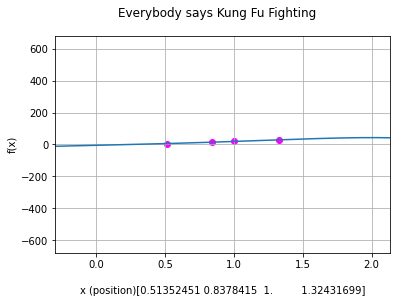

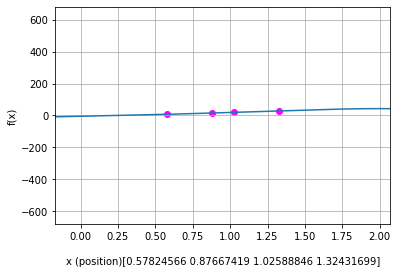

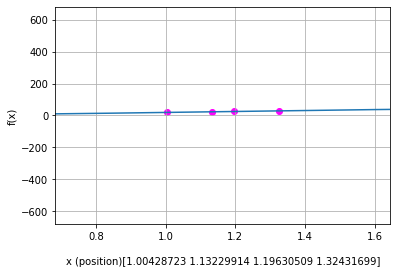

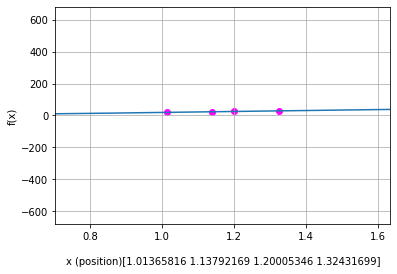

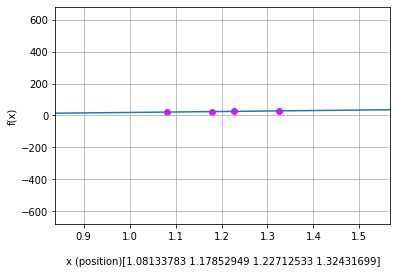

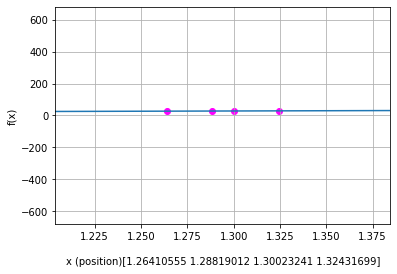

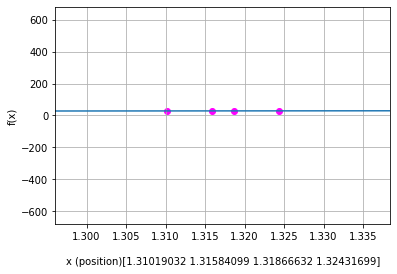

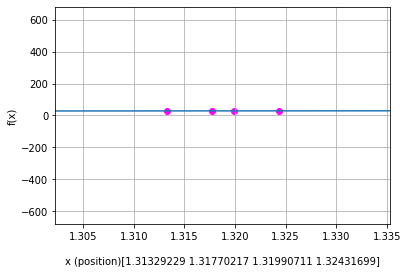

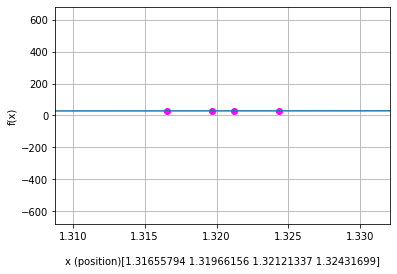

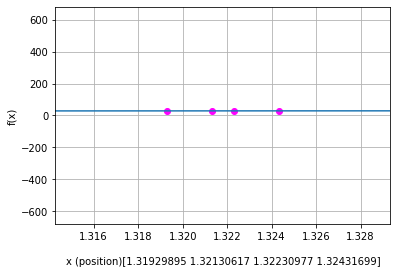

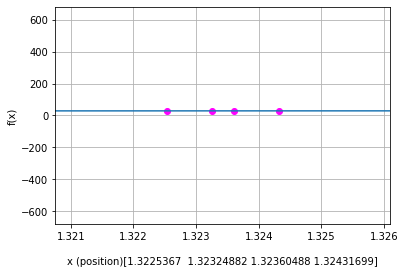

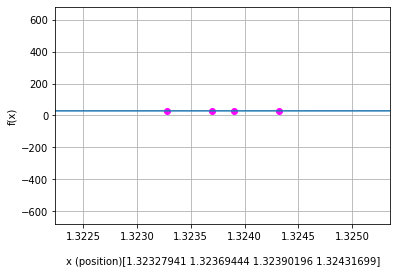

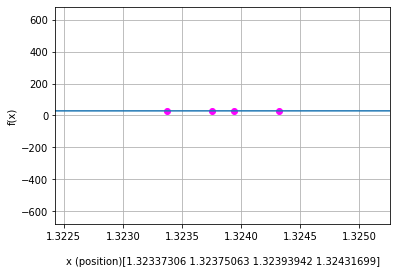

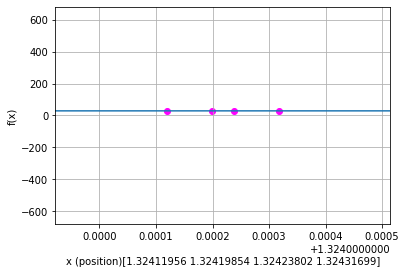

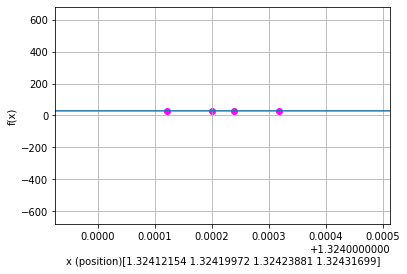

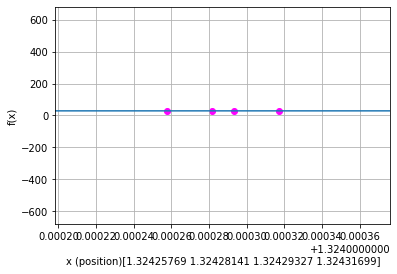

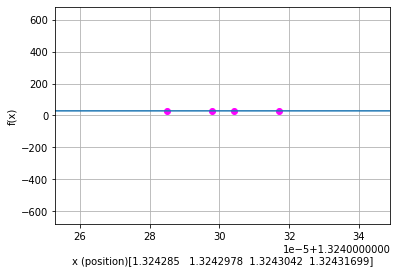

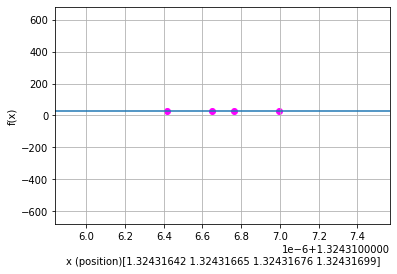

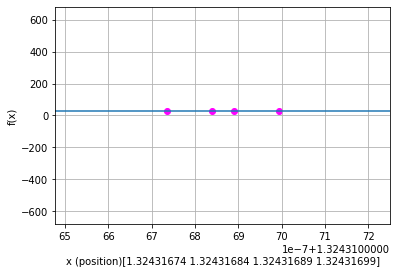

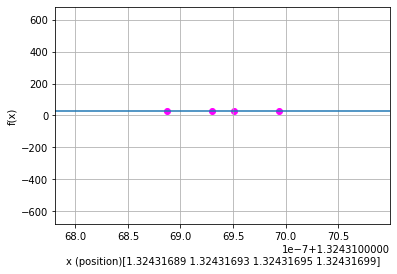

In [381]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.ion()

for index in range(ITERATIONS):
    fig.clf()
    fig.suptitle("Everybody says Kung Fu Fighting")

    x = np.arange(-4, 4, 0.01)
    function = -(x**5)+5*(x**3)+20*x-5
    particles_location_x = History_Position[index*4:index*4+4]
    particles_location_y = f(History_Position[index*4:index*4+4])

    plt.scatter(particles_location_x,particles_location_y,c='magenta')

    # np.set_printoptions(precision=8)
    plt.xlabel(f"\nx (position){particles_location_x}")
    plt.ylabel("f(x)")

    LB = 2*min(History_Position[index*4:index*4+4])\
             -max(History_Position[index*4:index*4+4])
    UB = 2*max(History_Position[index*4:index*4+4])\
            -min(History_Position[index*4:index*4+4])

    plt.xlim(LB, UB)
    plt.plot(x, function)
    plt.grid()

    plt.pause(0.2)

plt.ioff()

plt.show()
